## Task 1:
### Problem - Develop and evaluate an image classifier using Convolution Neural Network.

### The Data = CIFAR 10 datset.

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.
https://www.cs.toronto.edu/~kriz/cifar.html


# CIFAR-10 Multiple Classes
# New section
Example of using Keras for CNNs. Use a famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
#
# Your code to import matplotlib, pandas and numpy libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Following code loads the CIFAR 10 datset.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 29s 0us/step


In [4]:
#
# Your code to print shapes of training and test data. Check how the data looks
#
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
# Your code to print the shape of one image.
x_train[0].shape

(32, 32, 3)

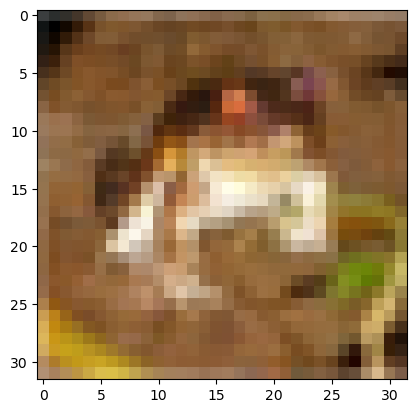

In [7]:
# Your code to show any sample image in the dataset. Use - plt.imshow()
plt.imshow(x_train[0])

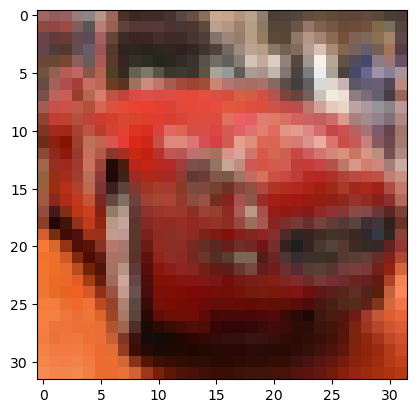

In [8]:
# Show any other image
plt.imshow(x_train[5])

# PreProcessing

In [15]:
# Your code to print one image in digitals. Check how pixels look like. 
print(x_train[0])

[[[0.26222222 0.27555556 0.28      ]
  [0.19111111 0.20444444 0.2       ]
  [0.22222222 0.21333333 0.19111111]
  ...
  [0.70222222 0.58666667 0.48      ]
  [0.67555556 0.55555556 0.45333333]
  [0.65777778 0.55111111 0.45777778]]

 [[0.07111111 0.08888889 0.08888889]
  [0.         0.         0.        ]
  [0.08       0.03555556 0.        ]
  ...
  [0.54666667 0.39111111 0.24444444]
  [0.52888889 0.36888889 0.22222222]
  [0.54222222 0.38666667 0.25333333]]

 [[0.11111111 0.10666667 0.09333333]
  [0.07111111 0.03111111 0.        ]
  [0.21777778 0.12       0.03555556]
  ...
  [0.52444444 0.37333333 0.22222222]
  [0.53333333 0.37333333 0.22222222]
  [0.48444444 0.32444444 0.18666667]]

 ...

 [[0.92444444 0.75555556 0.42666667]
  [0.89333333 0.68       0.15111111]
  [0.88       0.71555556 0.11555556]
  ...
  [0.71111111 0.59111111 0.31111111]
  [0.24888889 0.13777778 0.03111111]
  [0.23555556 0.15111111 0.08888889]]

 [[0.8        0.61777778 0.42666667]
  [0.76888889 0.54666667 0.18666667]


In [10]:
# Your code to print shape of any image i.e particular value in the x_train
x_train[0].shape

(32, 32, 3)

In [11]:
# Your code to print the maximum value in x_train. Hint - Use .max()
x_train.max()

255

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
# Print the shape of x_train again.
x_train.shape

(50000, 32, 32, 3)

In [14]:
# Print the shape of y_train again.
y_train.shape

(50000, 1)

# One hot vector encoding.
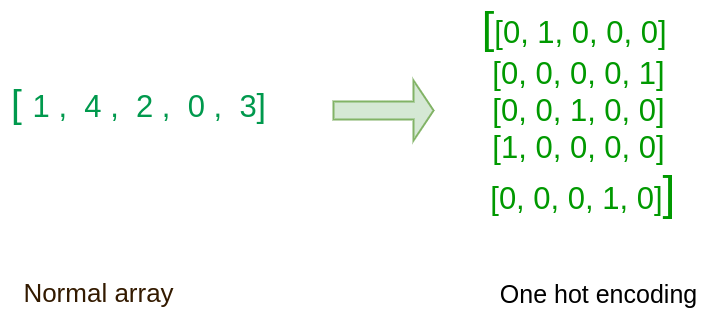


The "to_categorical()" is converting the integer value to binary categorical matrix :: https://keras.io/api/utils/python_utils/#to_categorical-functionLinks to an external site.

In [21]:
from tensorflow.keras.utils import to_categorical

# Your code to print shape of y_train [0]
print(y_train[0].shape)

# Your code to use to_categorical to convert integers to numbers. Assign the new array to the variable y_cat_train
y_cat_train = to_categorical(y_train,10)

(1,)


In [22]:
# Your code to print shape of the array y_cat_train
print(y_cat_train.shape)

(50000, 10)


In [23]:
# Your code to print any single value in the array y_cat_train and print y_train with the same index.
print(y_cat_train[5])
print(y_train[5])
# Compare the result for better understanding of "to_categorical()"

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1]


In [24]:
# Your code to:
# Convert y_test to the encoded vector in same manner/ Assign it to the variable y_cat_test
y_cat_test = to_categorical(y_test)
# Print the shapes to look how y_cat_test looks.
print(y_cat_test.shape)

(10000, 10)


----------
# Building the Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Please read the following links before creating code for the next cell

https://keras.io/api/layers/convolution_layers/convolution2d/
    
https://keras.io/api/layers/pooling_layers/max_pooling2d/

In [26]:
model = Sequential()


model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

#
# Add more convolution and pooling layers with your choice of filters, strides, and activation function
#

# Second Convolution Layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Third Convolution Layer
model.add(Conv2D(filters=128, kernel_size=(2,2), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

#
# Add few dense layers. 
#
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

### We could use early stopping in Keras to break from the training.
### What this does is for successive iterations it monitors the loss. If the loss does not decreases for a certain number of iterations denoted by variable 'patience' then the training stops.
### Following code shows how you can use early stopping.


In [28]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [29]:
# Your code to compile the models (model.compile). Use 'categorical cross entropy' as the loss function
# and use 'accuracy' as the metrics
# Your can use the optimiser of your choice
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
# Your code to fit the model (model.fit). Use additional parameter -  callbacks = [early_stop] to eanable early stopping. 
# use 'history' array to save the training parameters for each epoch
history = model.fit(x_train, y_cat_train, 
                    validation_data=(x_test, y_cat_test), 
                    epochs=10, 
                    callbacks=[early_stop], 
                    shuffle = True, 
                    verbose = 1)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3812 - accuracy: 0.8631 - val_loss: 1.2349 - val_accuracy: 0.6647
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3534 - accuracy: 0.8741 - val_loss: 1.2289 - val_accuracy: 0.6703
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3309 - accuracy: 0.8806 - val_loss: 1.2703 - val_accuracy: 0.6758
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3104 - accuracy: 0.8895 - val_loss: 1.3146 - val_accuracy: 0.6681
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2892 - accuracy: 0.8957 - val_loss: 1.3455 - val_accuracy: 0.6706


### We can save the model in a file. Following code shows how to do this.

In [34]:
# Careful, don't overwrite file!
model.save('cifar_10epochs.keras')

### We can save the loss at every step. Following code shows how to do this. 

In [38]:
losses = pd.DataFrame(model.history.history)

In [39]:
# Print first few rows of losses.
print(losses.head(10))

       loss  accuracy  val_loss  val_accuracy
0  0.381215   0.86308  1.234935        0.6647
1  0.353377   0.87410  1.228877        0.6703
2  0.330872   0.88056  1.270298        0.6758
3  0.310427   0.88952  1.314627        0.6681
4  0.289215   0.89570  1.345505        0.6706


### Visualise a plot between accuracy vs val_accuracy for all steps.

### x axis will have the steps (epochs) 
### y axis will have accuracy and val_accuracy 





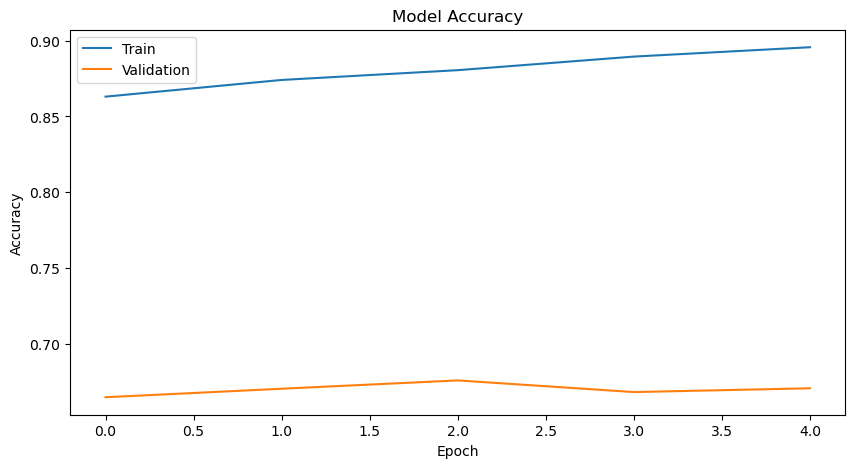

In [41]:
# 
# Your code to plot accuracy and val_accuracy vs the epochs
#
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

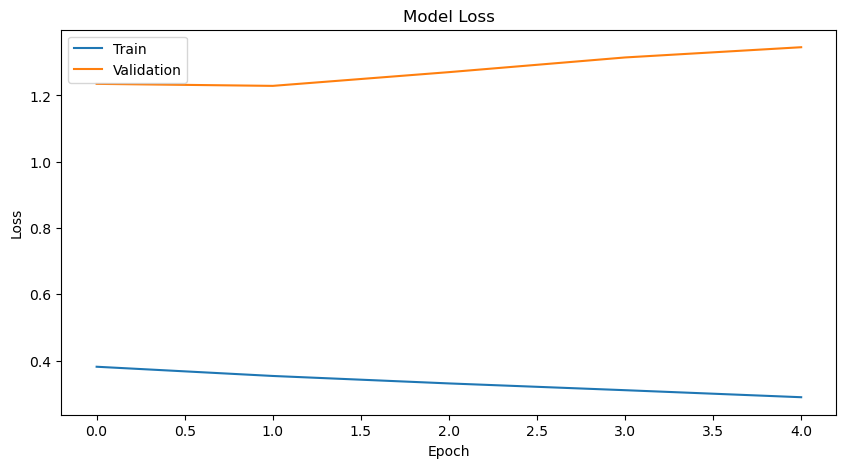

In [42]:
# 
# Your code to plot loss and val_loss vs the epochs
#
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### You could print the metrics name that model have used.

### Following code shows how to do this.

In [43]:
model.metrics_names

['loss', 'accuracy']

### Following code shows how to evaluate your model.

In [44]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.3455052375793457, 0.6705999970436096]

### Make a prediction on test data set.   

In [45]:
predictions_prob = model.predict(x_test)
predictions = predictions_prob.argmax(axis = -1)

313/313 [==============================] - 1s 3ms/step


### We could get the full classification report. 

In [46]:
# Your code to import classification_report library from sklearn.metrics
from sklearn.metrics import classification_report

In [47]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.67      0.71      0.69      1000\n           1       0.82      0.77      0.80      1000\n           2       0.57      0.60      0.59      1000\n           3       0.47      0.52      0.49      1000\n           4       0.58      0.66      0.61      1000\n           5       0.63      0.52      0.57      1000\n           6       0.72      0.77      0.74      1000\n           7       0.71      0.71      0.71      1000\n           8       0.83      0.71      0.76      1000\n           9       0.79      0.73      0.76      1000\n\n    accuracy                           0.67     10000\n   macro avg       0.68      0.67      0.67     10000\nweighted avg       0.68      0.67      0.67     10000\n'

### We could also get and plot confusion matrix. 

https://github.com/matplotlib/matplotlib/issues/14751

In [48]:
# Your code to import confusion_matrix library from sklearn.metrics
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test,predictions)

array([[707,  25,  70,  29,  45,  15,  12,  14,  64,  19],
       [ 39, 773,  22,  12,   6,  13,  21,  12,  21,  81],
       [ 66,   3, 604,  77,  94,  45,  61,  38,   6,   6],
       [ 28,  14,  83, 520,  92, 117,  64,  60,   8,  14],
       [ 22,   4,  76,  81, 656,  28,  55,  64,   6,   8],
       [ 12,   6,  70, 216,  68, 524,  27,  64,   6,   7],
       [ 10,   4,  67,  76,  38,  24, 765,   7,   7,   2],
       [ 19,   3,  33,  57,  96,  45,  16, 713,   4,  14],
       [108,  29,  19,  19,  28,  12,  19,  13, 711,  42],
       [ 43,  81,  20,  27,  13,  14,  17,  25,  27, 733]], dtype=int64)

<Axes: >

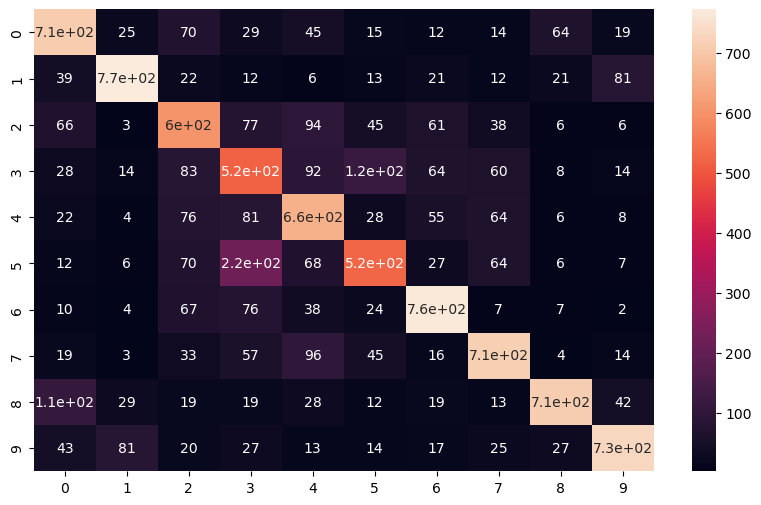

In [50]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)


# Following code makes a prediction on specific image.

In [51]:
my_image = x_test[16]

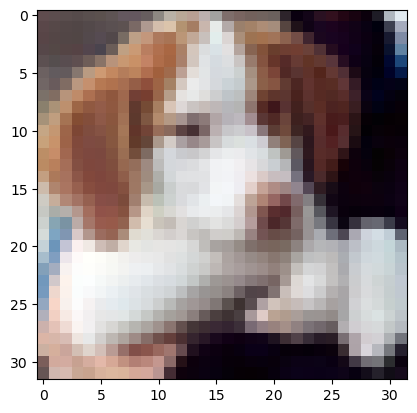

In [52]:
plt.imshow(my_image)

In [53]:
# SHAPE --> (num_images,width,height,color_channels)

model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 36ms/step


array([[5.2700558e-05, 3.2263165e-09, 8.0835453e-05, 8.2561976e-01,
        4.3667533e-06, 1.7155793e-01, 3.4154978e-05, 2.6501992e-03,
        5.1337587e-08, 5.0849208e-10]], dtype=float32)

In [56]:
# Find the highest probability value in the vector above. 
# What output value does it point to?
# Assuming the probabilities vector is named 'probabilities'
probabilities = np.array([[5.2700558e-05, 3.2263165e-09, 8.0835453e-05, 8.2561976e-01,
                           4.3667533e-06, 1.7155793e-01, 3.4154978e-05, 2.6501992e-03,
                           5.1337587e-08, 5.0849208e-10]])

# Find the index of the highest probability
predicted_class_index = np.argmax(probabilities)

# Assuming class labels are 0 to 9
predicted_class = predicted_class_index

print(f"The highest probability corresponds to class {predicted_class}.")

The highest probability corresponds to class 3.


In [57]:
# Check your result to run the code:

np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis = -1)

1/1 [==============================] - 0s 29ms/step


array([3], dtype=int64)

### Let's use a trained neural network
You can run the following code many times

Note the recognition probabilities for each image

1/1 [==============================] - 0s 20ms/step


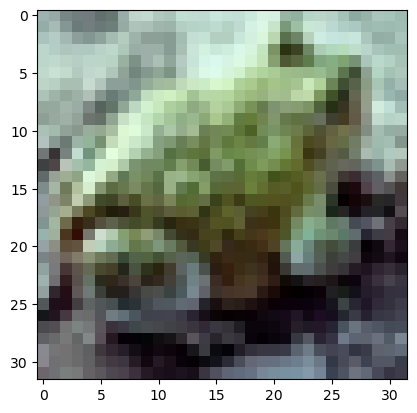

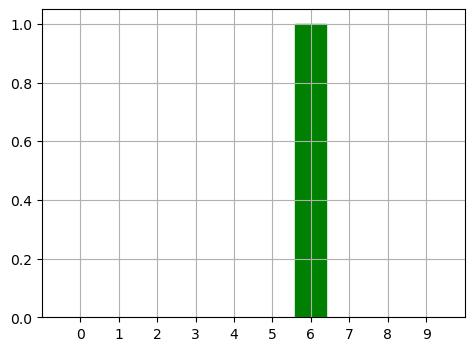

The predicted answer: frog 
 Correct answer: frog
['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'hors', 'ship', 'truck']


In [59]:
from tensorflow.keras.preprocessing.image import array_to_img
import random

# Class names in the CIFAR-10 dataset
classes=['aircraft', 'car', 'bird', 'cat', 'deer',
'dog', 'frog', 'hors', 'ship', 'truck']

# we take a random element 'random.randint()' from the test sample
# and observe: the neural network will guess or not
index = random.randint(0, x_test.shape[0])
plt.imshow(array_to_img(x_test[index]))

# test image conversion
x = x_test[index]
x = np.expand_dims(x, axis=0)

# start recognition
prediction = model.predict(x)
sample = x

# converting the result from one hot encoding format
ans = np.argmax(prediction)

fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1, 2, 2)
bar_list = ax.bar(np.arange(10), prediction[0], align='center')
bar_list[ans].set_color('g')
ax.set_xticks(np.arange(10))
ax.set_xlim([-1, 10])
ax.grid('on')

plt.show()

print('The predicted answer: {}'.format((classes[ans])), "\n",
     'Correct answer: {}'.format(classes[y_test[index][0]]) )

print(classes)


# You can run this cell many times, and each time you will get a new picture,which
# this neural network will recognise with the probability indicated on the graph.

## Task 2:

Evaluate your model for different optimisers available in the Keras. 

https://keras.io/api/optimizers/

- Store the optimisers in an array.
- Use for loop to fit, compile, and  test your model.
- Plot the accuracy vs optimiser


In [3]:
# Create a list containing the names of optimisers (Don't use 'AdamW' and 'Adafactor')
# Create an empty list to store scores

# For every optimiser
   # compile your model
   # fit your model, use epochs=3 for each optimiser (otherwise the training will take a long time)
   # using model.evaluate() find score and append the score in a list

# Plot score vs optimiser 

# Lab logbook requirement: 
# Please ensure to document in your laboratory logbook a graphical representation depicting the train loss and validation loss trends. 
# Based on this analysis, determine the optimal number of epochs for training your model. 